NAME: OKPARAJI STANLEY UDODIRI

EMAIL: okparajistanley9@gmail

HAMOYE ID: 14548b1b7c81f000

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#loading the dataset
df = pd.read_csv("Data_for_UCI_named.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tau1,10000.0,5.250000,2.742548,0.500793,2.874892,5.250004,7.624690,9.999469
tau2,10000.0,5.250001,2.742549,0.500141,2.875140,5.249981,7.624893,9.999837
tau3,10000.0,5.250004,2.742549,0.500788,2.875522,5.249979,7.624948,9.999450
tau4,10000.0,5.249997,2.742556,0.500473,2.874950,5.249734,7.624838,9.999443
p1,10000.0,3.750000,0.752160,1.582590,3.218300,3.751025,4.282420,5.864418
p2,10000.0,-1.250000,0.433035,-1.999891,-1.624901,-1.249966,-0.874977,-0.500108
p3,10000.0,-1.250000,0.433035,-1.999945,-1.625025,-1.249974,-0.875043,-0.500072
p4,10000.0,-1.250000,0.433035,-1.999926,-1.624960,-1.250007,-0.875065,-0.500025
g1,10000.0,0.525000,0.274256,0.050009,0.287521,0.525009,0.762435,0.999937
g2,10000.0,0.525000,0.274255,0.050053,0.287552,0.525003,0.762490,0.999944


In [5]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
# split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
x = df.drop(columns=["stab", "stabf"])
y = df["stabf"]
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
#using standard scaler to transform X_train and X_test dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

In [10]:
#Converting to dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns = X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = X_test.columns)

In [11]:
x_train_scaled.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


#### Question 2

In [12]:
TP = 255
FP = 1380
TN = 20
FN = 45
# To calculate precision and recall respectively
precision = TP/(TP + FP)
recall = TP/(TP + FN)
#calculting F1_Score
F1_Score = 2*((precision*recall)/(precision+recall))
print("F1_Score is: ", round(F1_Score,4))

F1_Score is:  0.2636


#### Question 14

In [14]:
#RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(random_state = 1)
random_forest.fit(x_train_scaled, y_train)
pred = random_forest.predict(x_test_scaled)

In [15]:
# my accuracy for RandomForestClassifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
print('Accuracy is {}'.format(round(accuracy, 4)))

Accuracy is 0.928


#### Question 15

In [16]:
# transform our y_train and y_test
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
label_encoded_y = label_encoder.transform(y_train)
y_test_encoded  = label_encoder.transform(y_test)

In [17]:
# Fit XGBoost to the training data
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_scaled, label_encoded_y)
print('The XGboost=', xgb.score(x_test_scaled,y_test_encoded))

The XGboost= 0.946


#### Question 16

In [18]:
#LGBM
from lightgbm import LGBMClassifier
lgbm= LGBMClassifier(random_state = 1)
lgbm.fit(x_train_scaled, y_train)

LGBMClassifier(random_state=1)

In [19]:
#To predict on test set
lgbm_pred = lgbm.predict(x_test_scaled)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('Accuracy is {}'.format(round(lgbm_accuracy, 4)))

Accuracy is 0.9365


#### Question 17

In [20]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
param = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split,'max_features': max_features}

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_class = ExtraTreesClassifier()
from sklearn.model_selection import RandomizedSearchCV
randomcv = RandomizedSearchCV(estimator = extra_tree_class, 
                              param_distributions = param, 
                              cv=5, n_iter=10, 
                              scoring = 'accuracy', 
                              n_jobs = -1, 
                              verbose = 1, 
                              random_state = 1)

In [22]:
#fitting on the training data
search = randomcv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [23]:
#Looking for Hyperparameters
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

#### Question 18

In [29]:
#For testing ExtraTreesClassifier on test set using Hyper parameters
extra_tree_class_2 = ExtraTreesClassifier(max_features = None, 
                            min_samples_leaf= 8,
                            min_samples_split= 2,
                            n_estimators= 1000, 
                            random_state = 1)
extra_tree_class_2.fit(x_train_scaled, y_train)

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [31]:
#To predict on test set
extra_tree_class_pred = extra_tree_class_2.predict(x_test_scaled)
accuracy = accuracy_score(y_test, extra_tree_class_pred)
print('Accuracy is {}'.format(round(accuracy, 4)))

Accuracy is 0.9285


#### Question 20

In [24]:
extra_tree_class.fit(x_train_scaled, y_train)
prediction = extra_tree_class.predict(x_test_scaled)
#For testing model accuracy
accuracy = accuracy_score(y_test,prediction)
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9335


<BarContainer object of 12 artists>

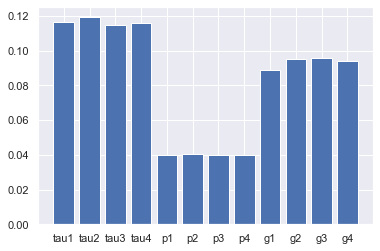

In [25]:
feature_importance = extra_tree_class.feature_importances_
plt.bar(x_train_scaled.columns, feature_importance)

In [26]:
value =pd.DataFrame(feature_importance,index = x_train_scaled.columns)
value.sort_values(by=0,ascending= False)

,0
tau2,0.119297
tau1,0.116362
tau4,0.115904
tau3,0.114741
g3,0.095638
g2,0.095166
g4,0.094085
g1,0.088712
p2,0.040243
p4,0.040061


In [27]:
value.max()

0    0.119297
dtype: float64

In [28]:
# to get the the most and least importance respectively
display(value.nlargest(n=1,columns=0))
display(value.nsmallest(n=1,columns=0))

,0
tau2,0.119297


,0
p1,0.039754
